<a href="https://colab.research.google.com/github/JennyMyy/Data-analytiikka/blob/main/Kunnat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuntien tilastojen tarkastelua

In [85]:
#Yhdistetään Google driveen
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/data


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Kaavioiden prosenttiakselin muotoiluun
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

from scipy.stats import pearsonr

# Sanakirja taulukoiden muotoiluun
# f-sarakkeeseen 0 desimaalia, %-sarakkeeseen 1 desimaali
format = {'lkm':'{:.0f}', '%':'{:.1f} %'}

In [87]:
# Luetaan data

df = pd.read_excel('kunnat.xlsx')

df

,Unnamed: 0,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
1,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
2,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
3,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
4,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,6587,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5
305,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,9714,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1
306,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,595,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8
307,Ähtäri,61.9,5484,-0.7,13.4,52.4,34.2,0.1,1.2,-52,...,2029,10.7,25.2,62.5,101.1,586.6,3621.9,9556.5,1544.0,4759.7


In [88]:
df.shape

(309, 33)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 33 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Unnamed: 0                                                                              309 non-null    object 
 1   Taajama-aste, %, 2020                                                                   309 non-null    float64
 2   Väkiluku, 2021                                                                          309 non-null    int64  
 3   Väkiluvun muutos edellisestä vuodesta, %, 2021                                          309 non-null    float64
 4   Alle 15-vuotiaiden osuus väestöstä, %, 2021                                             309 non-null    float64
 5   15-64 -vuotiaiden osuus väestöstä, %, 2021                             

In [90]:
# Muutetaan 'Unnamed: 0' kuvaavammaksi nimeksi

df = df.rename(columns={'Unnamed: 0':'Kunnat'})

# Korjataan indeksisarakkeen numerointi alkamaan ykkösestä
# Luodaan uusi sarake "nro" ja käytetään sitä indeksinä
df['nro'] = range(1, len(df) + 1)
df.set_index('nro', inplace=True)

df

,Kunnat,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
nro,,,,,,,,,,,,,,,,,,,,,
1,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
2,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
3,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
4,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
5,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,6587,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5
306,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,9714,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1
307,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,595,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8


# Väkiluku

In [91]:
# Tehdää väkilukuluokka, jolloin on helpompi tarkastella väkivluvultaan kuntien suuruutta.

bins = [0, 10000, 50000, 100000, 1000000]
df['Väkilukuluokka'] = pd.cut(df['Väkiluku, 2021'], bins=bins, right=False)
df

,Kunnat,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020",Väkilukuluokka
nro,,,,,,,,,,,,,,,,,,,,,
1,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7,"[10000, 50000)"
2,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8,"[0, 10000)"
3,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8,"[0, 10000)"
4,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0,"[10000, 50000)"
5,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3,"[0, 10000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5,"[10000, 50000)"
306,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1,"[10000, 50000)"
307,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8,"[0, 10000)"


In [92]:
# Väkilukuluokkaan kuuluvien frekvenssit
df1 = pd.crosstab(df['Väkilukuluokka'], 'lkm')

# Otsikoiden muuttaminen
df1.columns.name = ''


# Prosentit
n = df1['lkm'].sum()
df1['%'] = df1['lkm']/n*100

# Yhteensä-rivi
df1.loc['Yhteensä kuntaa'] = df1.sum()

# Tyylimäärittely
df1.style.format(format)

,lkm,%
Väkilukuluokka,,
"[0, 10000)",212,68.6 %
"[10000, 50000)",76,24.6 %
"[50000, 100000)",12,3.9 %
"[100000, 1000000)",9,2.9 %
Yhteensä kuntaa,309,100.0 %


Taulukosta nähtävillä, että Suomen kunnista 68,6% on alle 10 000 asukkaan kuntia löytyy 212.
Yhdeksän kuntaa ainostaa väkiluvultaan yli 100 000 asukasta.

In [93]:
# Väkiluokuluokan kautta lasketaan väkilukumäärä ja keskiarvo, tehdään pivot taulukko
df1 = df.pivot_table(values='Väkiluku, 2021', index='Väkilukuluokka', aggfunc=['mean', sum, len])

df1.columns = ['Keskiarvo', 'Yhteensä', 'Lukumäärä']

df1.style.format(precision=0).background_gradient(cmap='Reds', axis=0)

,Keskiarvo,Yhteensä,Lukumäärä
Väkilukuluokka,,,
"[0, 10000)",4190,888232,212
"[10000, 50000)",21658,1646015,76
"[50000, 100000)",65354,784245,12
"[100000, 1000000)",247750,2229749,9


Suurimmissa kunnissa asui yhteensä 2 220 749 asukasta. Seuraavaksi eniten asuu 10 000 - 50 000 suuruisissa kunnissa. Keskimäärin pienimmissä kunnissa asuu 4190 asukasta.

In [94]:
# Eri ikäluokkien tunnusluvut

df1 = df[['Alle 15-vuotiaiden osuus väestöstä, %, 2021', '15-64 -vuotiaiden osuus väestöstä, %, 2021',
          'Yli 64-vuotiaiden osuus väestöstä, %, 2021']].describe()

# Muotoillaan vielä prosenttiluvut yhden desimaalin tarkkuudella.
df1.T.style.format('{:.1f}')

,count,mean,std,min,25%,50%,75%,max
"Alle 15-vuotiaiden osuus väestöstä, %, 2021",309.0,14.8,3.9,4.0,12.1,14.4,16.9,30.8
"15-64 -vuotiaiden osuus väestöstä, %, 2021",309.0,55.6,4.4,46.5,52.3,55.5,58.3,68.1
"Yli 64-vuotiaiden osuus väestöstä, %, 2021",309.0,29.7,7.1,10.8,25.0,29.3,35.1,44.6


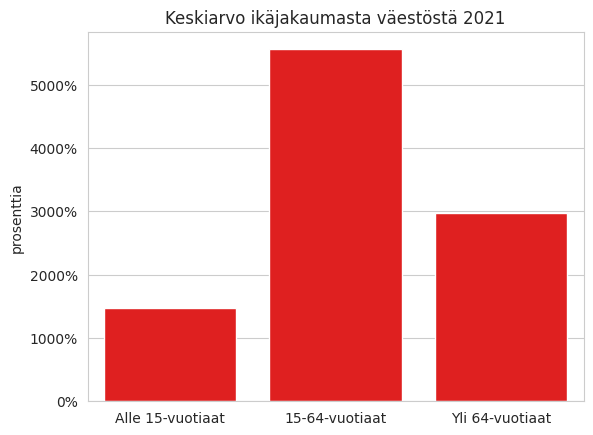

In [125]:
# Tehdaan lista
lista1 = ['Alle 15-vuotiaiden osuus väestöstä, %, 2021', '15-64 -vuotiaiden osuus väestöstä, %, 2021',
                     'Yli 64-vuotiaiden osuus väestöstä, %, 2021']

# Lasketaan listan keskiarvo
keskiarvo = df[lista1].mean()

# Luodaan pylväs kaavio
sns.barplot(x=keskiarvo.index, y=keskiarvo.values, color='red')

# Muotoillaan vielä taulukko siistimmän näköiseksi
iat = ['Alle 15-vuotiaat', '15-64-vuotiaat', 'Yli 64-vuotiaat']
plt.xticks(range(len(iat)), iat)
plt.ylabel('prosenttia')
plt.title('Keskiarvo ikäjakaumasta väestöstä 2021')
plt.xlabel('')

# Vielä y-akselille %-merkki selkiytääkseni,kaaviota
plt.gca().yaxis.set_major_formatter(ticks)

Väestöstä 2021 ollut yli 64 vuotiaita koko väestöstä lähes 30% ja alle 15-vuotiaita alle 15%.

#9 Suurimman kaupungin työllisyysaste

In [136]:
df2 = df[['Työllisyysaste, %, 2020', 'Työttömien osuus työvoimasta, %, 2020']][df['Väkiluku, 2021'] > 100000]

tyollisyys = ['Työllisyys', 'Työttömyys']

kaupungit = ['Espoo', 'Helsinki', 'Jyväskylä', 'Kuopio', 'Lahti', 'Oulu', 'Tampere', 'Turku', 'Vantaa']

df2.index= kaupungit

df2.columns = tyollisyys

# Ulkoasun stailaus
df2.style.format('{:.1f} %').background_gradient(cmap='Oranges')

,Työllisyys,Työttömyys
Espoo,71.8 %,11.5 %
Helsinki,69.0 %,14.1 %
Jyväskylä,64.1 %,15.9 %
Kuopio,67.7 %,13.0 %
Lahti,65.3 %,17.9 %
Oulu,66.9 %,14.0 %
Tampere,65.4 %,14.7 %
Turku,63.9 %,15.9 %
Vantaa,70.3 %,14.4 %


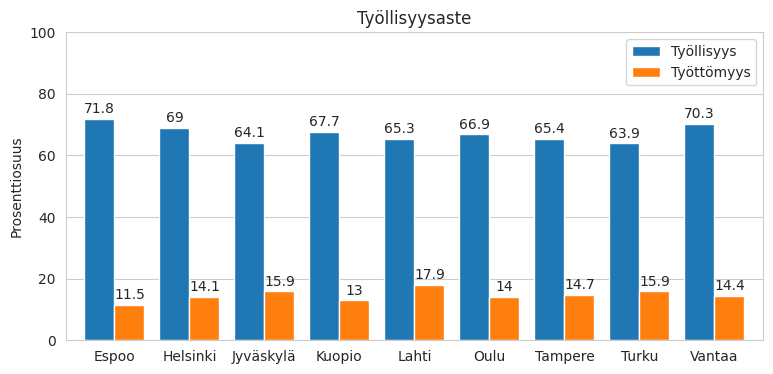

In [132]:
# Kaupunkien työllisyys pylväskaaviona

ax = df2.plot(kind='bar', figsize=(9, 4), rot=0, width=0.8)

plt.title('Työllisyysaste')
plt.ylabel('Prosenttiosuus')
plt.grid(axis='x')
plt.ylim(0,100)


for container in ax.containers:
  ax.bar_label(container, padding=2)

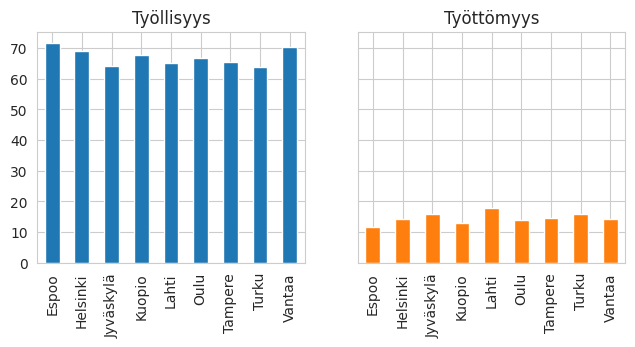

In [98]:
# Verrataan vielä työllisyyttä vielä toisellakin pylväskaaviolla

axs = df2.plot(kind='bar', figsize=(20, 3), legend=False, subplots=True, layout=(1, 5),
                           sharex=True, sharey=True)


Espoossa on suurin työllisyysaste sekä pienin työttömyysaste. Lahdessa on suurin työttömyysaste ja Turussa pienin työllisyysaste.

# Työpaikat

> Vertailaan työpaikkojen määrää väkilukuluokkaan selivittääkseni kuinka paljon alueilla on työpaikkoja.

In [99]:
# Työpaikkojen tilastolliset tunnusluvut väkilukuluokan mukaan

df4 = df.groupby('Väkilukuluokka')['Alueella olevien työpaikkojen lukumäärä, 2020'].describe()
df4.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Väkilukuluokka,,,,,,,,
"[0, 10000)",212,1326,945,22,575,1022,1935,4547
"[10000, 50000)",76,7460,3805,2343,4617,6586,9042,20658
"[50000, 100000)",12,27232,5928,17362,21336,28635,31911,34621
"[100000, 1000000)",9,123319,106948,48780,62971,98911,122603,398042


Yllä nähtävissä tilastollliset tunnusluvut Väkilukuluokka alueella olevista työpaikkojen lukumäärästä vuonna 2020. Suurimmissa kaupungeissa on huomattavasti eniten työpaikkoja.

## Kouluttautuneisuus 9 suurimmassa kunnassa

In [100]:
# Tehdään taulukko ja muotoilaan se

df3 = df[['Vähintään toisen asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020',
          'Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020']][df['Väkiluku, 2021'] > 100000]

koulutus = ['Toisen asteen tutkinto', 'Korkeakoulu tutkinto']

df3.index= kaupungit
df3.columns = koulutus

df3.style.format('{:.1f} %').background_gradient(cmap='Greens')

,Toisen asteen tutkinto,Korkeakoulu tutkinto
Espoo,76.6 %,47.6 %
Helsinki,77.0 %,45.1 %
Jyväskylä,80.1 %,37.2 %
Kuopio,78.9 %,34.3 %
Lahti,72.5 %,29.3 %
Oulu,79.9 %,37.7 %
Tampere,79.8 %,38.3 %
Turku,77.2 %,35.8 %
Vantaa,70.1 %,31.6 %


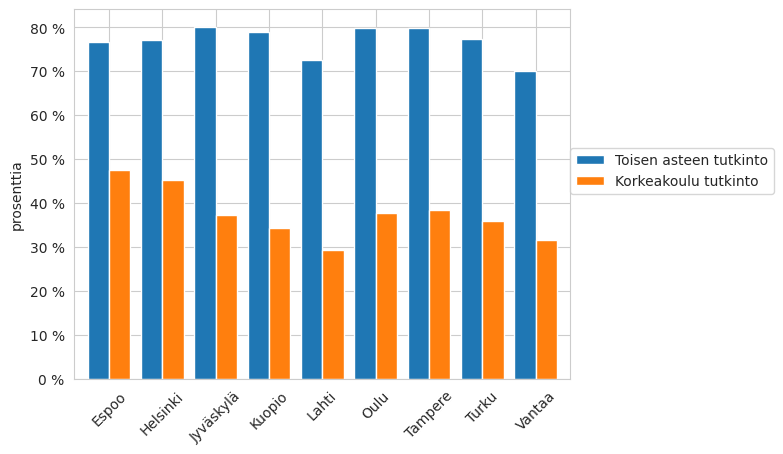

In [101]:
# Tehdään vielä pylväskaavio

df3.plot(kind = 'bar', width = 0.8, rot = 45)

plt.ylabel(f'prosenttia')
plt.gca().yaxis.set_major_formatter(ticks)

# Selitteen sijoittelu
plt.legend(loc=(1, 0.5))

Toisen asteen tutkinnon suorittaneita on eniten Jyväskylässä, Tampereella ja Oulussa väkilukuun nähden. Toisaalta jokaisella paikkakunnalla yli 70% on suorittanut toisen asteen tutkinnon. Korkeakoulu tutkinnon suorittaneita asuu eniten Espoossa ja Helsingissä.

# 9 suurimman kunnan asumismuodot ja perheet

In [102]:
# Taulukoidaan asuntomuodot

df5 = df[['Rivi- ja pientaloissa asuvien asuntokuntien osuus, %, 2021',
          'Vuokra-asunnoissa asuvien asuntokuntien osuus, %, 2020']][df['Väkiluku, 2021'] > 100000]
df5.index = kaupungit
df5.style.format('{:.1f} %').background_gradient(cmap='Purples')


,"Rivi- ja pientaloissa asuvien asuntokuntien osuus, %, 2021","Vuokra-asunnoissa asuvien asuntokuntien osuus, %, 2020"
Espoo,38.5 %,39.5 %
Helsinki,13.1 %,49.4 %
Jyväskylä,36.2 %,45.0 %
Kuopio,41.2 %,40.5 %
Lahti,32.6 %,41.1 %
Oulu,45.0 %,42.3 %
Tampere,23.4 %,49.4 %
Turku,24.4 %,49.9 %
Vantaa,33.8 %,41.9 %


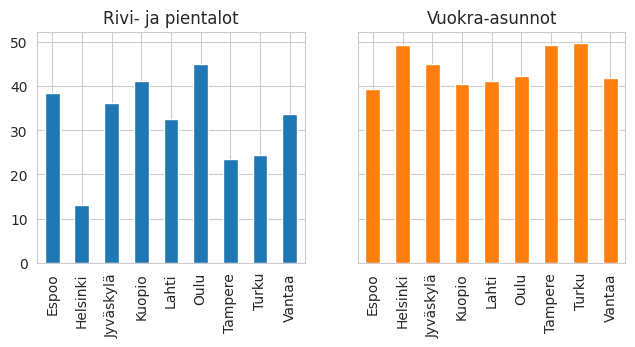

In [103]:
# Tehdään pylväskaaviot

axs = df5.plot(kind='bar', figsize=(20, 3), legend=False, subplots=True, layout=(1, 5),
                           sharex=True, sharey=True)

asunnot = ['Rivi- ja pientalot', 'Vuokra-asunnot']

for ax, asunto in zip(axs.flatten(), asunnot):
    ax.set_title(asunto)

Helsingissä selkeästi vähemmän asutaan rivi- tai pientaloissa, toisin kuin Oulussa asutaan eniten. Eniten asutaan vuokralla Helsingissä, Tampereella ja Turussa, mikä on lähes puolet asuntokunnista.  

In [104]:
# Taulukoidaan yhdessä asuminen asuntokuntiin ja perheeseen

df5 = df[['Perheiden lukumäärä, 2020',
          'Asuntokuntien lukumäärä, 2021']][df['Väkiluku, 2021'] > 100000]
df5.index = kaupungit
df5

,"Perheiden lukumäärä, 2020","Asuntokuntien lukumäärä, 2021"
Espoo,78406,136194
Helsinki,161282,347146
Jyväskylä,36337,77612
Kuopio,31686,64305
Lahti,30810,65496
Oulu,52572,106170
Tampere,59644,136968
Turku,47191,110254
Vantaa,62256,116058


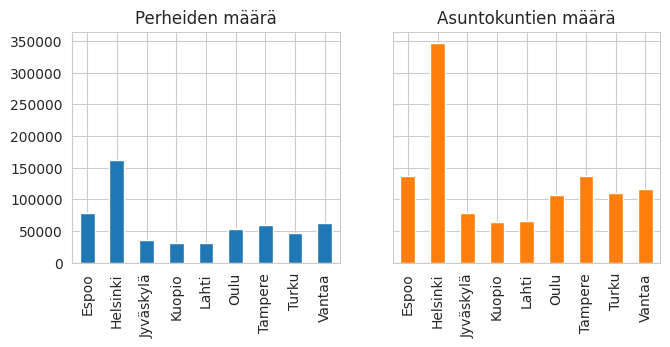

In [105]:
# Tehdään vielä kaaviot

axs = df5.plot(kind='bar', figsize=(20, 3), legend=False, subplots=True, layout=(1, 5),
                           sharex=True, sharey=True)

asuminen = ['Perheiden määrä', 'Asuntokuntien määrä']

for ax, asunto in zip(axs.flatten(), asuminen):
    ax.set_title(asunto)

Helsingissä asuu eniten ihmisiä, minkä vuoksi on myös enempi perheitä. Asuminen on myös kallista Hesingissä, jolloin muihin kaupunkeihin nähden on reipaasti enemmän asuntokuntia.

# Ruotsinkielisten ja ulkomaalaisten osuus 9 suurimmasta kaupungista

In [106]:
df6 = df[['Ruotsinkielisten osuus väestöstä, %, 2021', 'Ulkomaan kansalaisten osuus väestöstä, %, 2021']][df['Väkiluku, 2021'] > 100000]
df6.index = kaupungit
df6

,"Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021"
Espoo,6.7,13.0
Helsinki,5.6,10.3
Jyväskylä,0.2,3.5
Kuopio,0.1,2.9
Lahti,0.4,4.9
Oulu,0.2,3.4
Tampere,0.5,5.2
Turku,5.5,7.5
Vantaa,2.3,14.3


Espoossa ja Turussa asuu eniten ruotsinkielisiä. Keski-Suomessa ja idässä asuu alle prosentti kunnissa ruotsinkielisiä väestöstä.
Pk-seudulla eli Espoossa, Helsingissä ja Vantaalla asuu eniten ulkomaalaisia.

In [107]:
# Ruotsinkielisistä tilastilliset tunnusluvut

df6 = df.groupby('Väkilukuluokka')['Ruotsinkielisten osuus väestöstä, %, 2021'].describe()
df6.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Väkilukuluokka,,,,,,,,
"[0, 10000)",212,11,27,0,0,0,1,92
"[10000, 50000)",76,8,20,0,0,0,1,89
"[50000, 100000)",12,5,10,0,0,0,1,28
"[100000, 1000000)",9,2,3,0,0,0,6,7


In [108]:
df6 = df.groupby('Väkilukuluokka')['Ulkomaan kansalaisten osuus väestöstä, %, 2021'].describe()
df6.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Väkilukuluokka,,,,,,,,
"[0, 10000)",212,3,3,0,1,2,3,26
"[10000, 50000)",76,3,2,0,2,2,4,15
"[50000, 100000)",12,4,1,2,3,4,5,6
"[100000, 1000000)",9,7,4,3,4,5,10,14


Suurimmissa kaupungeissa on keskimäärin enemmän ulkomaan kansalaisia kuin pienemmillä paikkakunnilla. Taas pienemmillä paikakunnilla ruotsinkielisiä on keskimäärin enemmän kuin 9 suurimmassa kaupungissa. Pienimmissä kunnissa on lähes kokonaan ruotsinkielisiä kuntia.

# Korrelaatio ja hajontakaavio
> Väkiluvun vaikutus euroa/asukasta kohden vuonna 2020

In [112]:
lista2 = ['Vuosikate, euroa/asukas, 2020', 'Lainakanta, euroa/asukas, 2020', 'Konsernin lainakanta, euroa/asukas, 2020',
          'Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020', 'Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020', 'Väkiluku, 2021']

aineisto1 = df[lista2]
korrelaatiot = aineisto1.corr()
korrelaatiot

,"Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Väkiluku, 2021"
"Vuosikate, euroa/asukas, 2020",1.000000,-0.015792,0.057551,-0.045931,0.006223,0.057725
"Lainakanta, euroa/asukas, 2020",-0.015792,1.000000,0.743772,0.108376,0.059027,0.021147
"Konsernin lainakanta, euroa/asukas, 2020",0.057551,0.743772,1.000000,0.070425,0.255288,0.228539
"Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020",-0.045931,0.108376,0.070425,1.000000,-0.376794,0.078696
"Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020",0.006223,0.059027,0.255288,-0.376794,1.000000,-0.183148
"Väkiluku, 2021",0.057725,0.021147,0.228539,0.078696,-0.183148,1.000000


<Axes: >

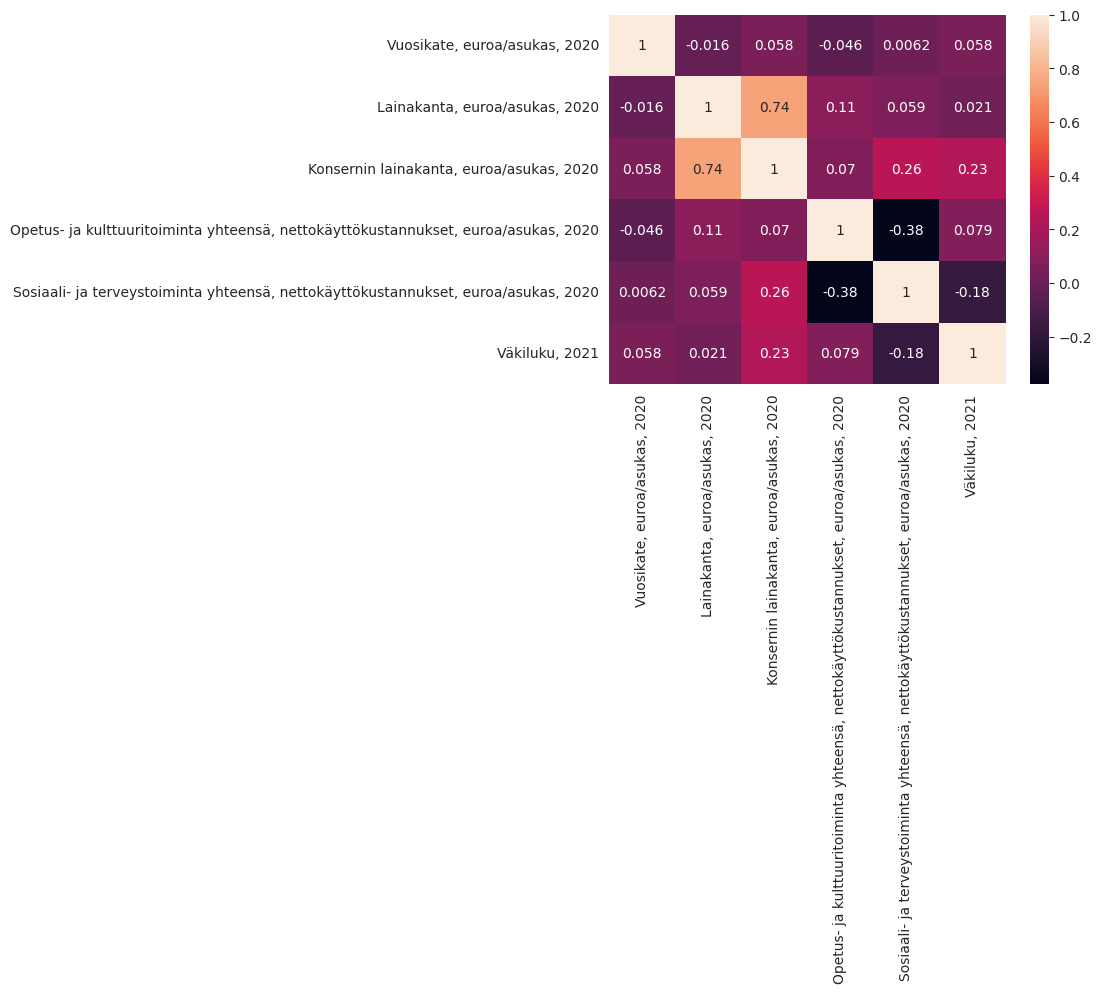

In [113]:
sns.heatmap(korrelaatiot, annot= True)

In [114]:
# Korrelaatiokertoimet ja p-arvot muuttujan "Väkiluku, 2021" kanssa

for muuttuja in aineisto1.columns:
        r, p = pearsonr(aineisto1['Väkiluku, 2021'], aineisto1[muuttuja])
        print(f'{muuttuja} r = {r:>6.3f}, p = {p:.3f}')

Vuosikate, euroa/asukas, 2020 r =  0.058, p = 0.312
Lainakanta, euroa/asukas, 2020 r =  0.021, p = 0.711
Konsernin lainakanta, euroa/asukas, 2020 r =  0.229, p = 0.000
Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020 r =  0.079, p = 0.168
Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020 r = -0.183, p = 0.001
Väkiluku, 2021 r =  1.000, p = 0.000


Korrelaatiot väkiluvun kanssa ovat merkitseviä Konsernin lainakanta, euroa/asukas, 2020 sekä Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020 kanssa.